In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
!ls ../data

all_output.tsv	    data_by_year.csv   df_cleaned__by_artist.csv
data_by_artist.csv  data.csv	       df_cleaned_genre_10.tsv
data_by_genres.csv  data_w_genres.csv  df_cleaned.tsv


In [3]:
data_path = Path('../data/')
df = pd.read_csv(data_path / 'data.csv')

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


/home/arth/Desktop/ECE-143/env/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acousticness', ylabel='Density'>

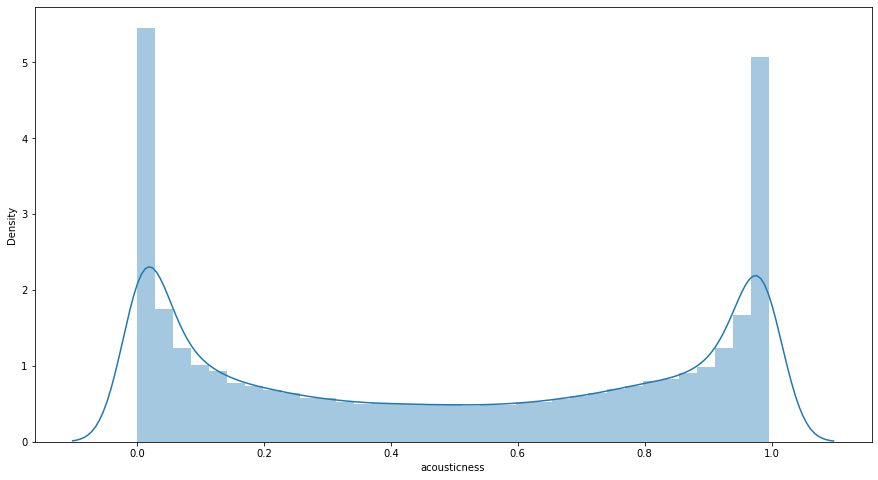

In [5]:
plt.figure(figsize=(15,8))
sns.distplot(df.acousticness)

In [6]:
max(df.popularity)

100

/home/arth/Desktop/ECE-143/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='year', ylabel='popularity'>

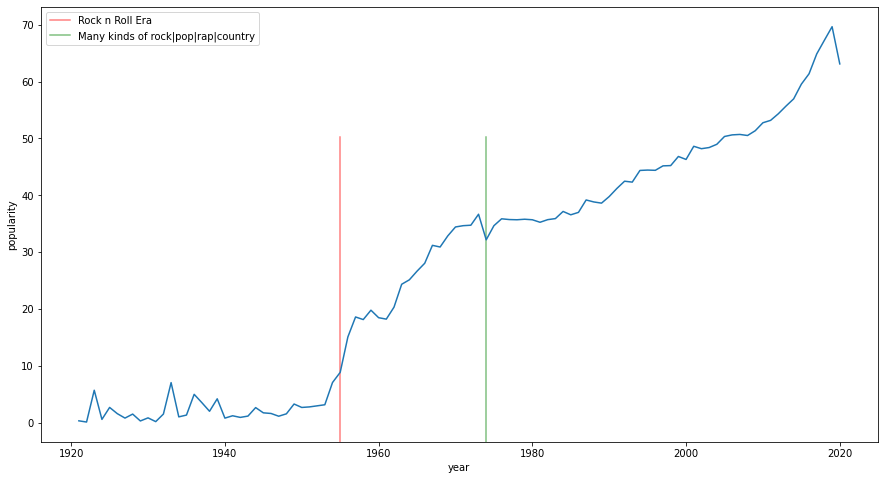

In [75]:
plt.figure(figsize=(15,8))
plt.axvline(1955, ymin=0, ymax=0.7, label="Rock n Roll Era", c='r', alpha=0.5)
plt.axvline(1974, ymin=0, ymax=0.7, label="Many kinds of rock|pop|rap|country", c='g', alpha=0.5)
sns.lineplot(df.groupby('year').max().index, df.groupby('year').popularity.mean())

/home/arth/Desktop/ECE-143/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/arth/Desktop/ECE-143/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'values')

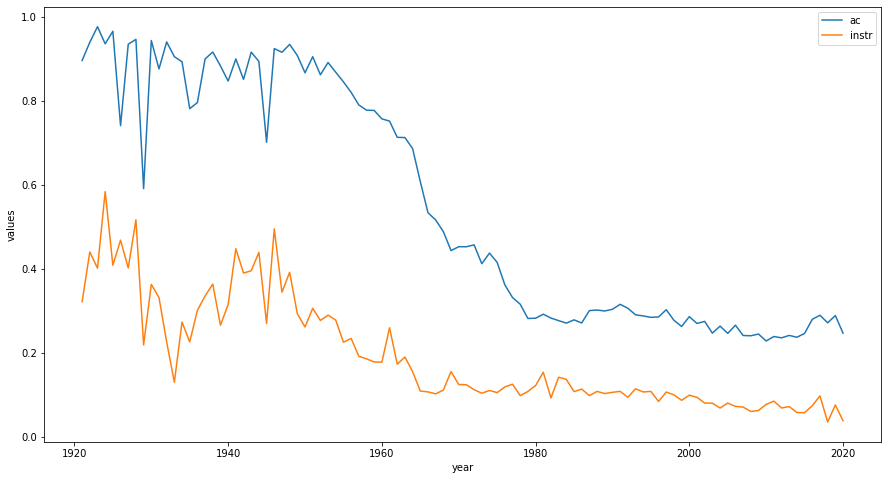

In [86]:
plt.figure(figsize=(15,8))
# plt.axvline(1955, ymin=0, ymax=0.7, label="Rock n Roll Era", c='r', alpha=0.5)
# plt.axvline(1974, ymin=0, ymax=0.7, label="Many kinds of rock|pop|rap|country", c='g', alpha=0.5)
sns.lineplot(df.groupby('year').max().index, df.groupby('year').acousticness.mean())
sns.lineplot(df.groupby('year').max().index, df.groupby('year').instrumentalness.mean())
# sns.lineplot(df.groupby('year').max().index, df.groupby('year')..mean())


plt.legend(['ac', 'instr'])
plt.ylabel('values')

<AxesSubplot:>

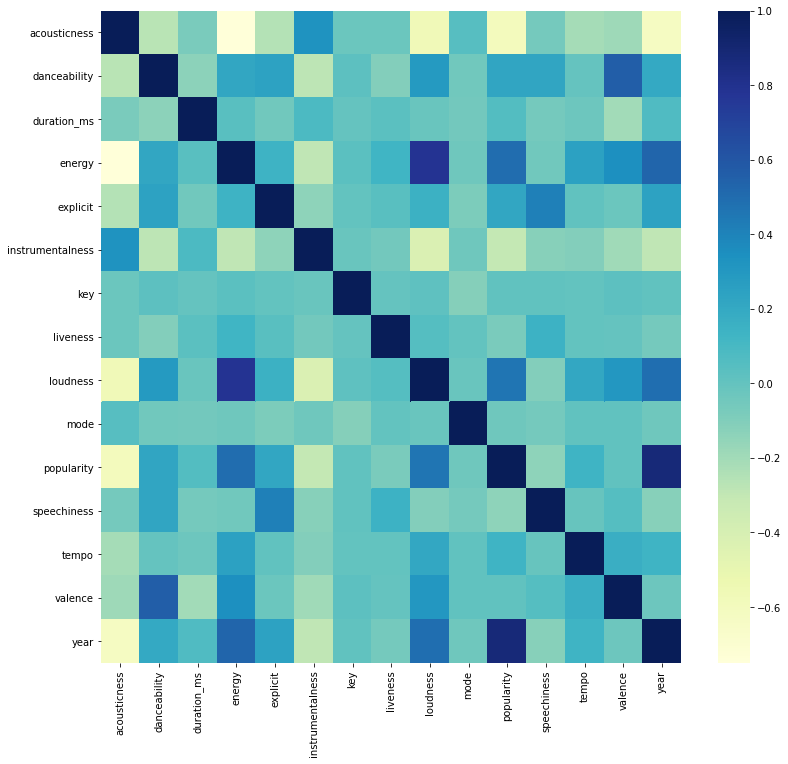

In [91]:
plt.figure(figsize=(13,12))
sns.heatmap(df.corr(), cmap='YlGnBu')